# 1. проведем разведовательный анализ (EDA) данных, предоставленных в проекте в виде тестового датасета
для начала импортируем используемые библиотеки

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns 

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [16]:
test = pd.read_csv('test.csv')
test.sample(3)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
11571,внедорожник 5 дв.,NISSAN,https://auto.ru/cars/used/sale/nissan/x_trail/...,синий,"{""id"":""21156572"",""name"":""SE"",""available_option...",А/М покупался и обслуживался у официального ди...,2.0 LTR,144 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,...,ALLROAD_5_DOORS VARIATOR 2.0,вариатор,JAPANESE,1 владелец,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен
4231,седан,AUDI,https://auto.ru/cars/used/sale/audi/a4/1100022...,коричневый,NaN,Автомобиль в эксклюзивной комплектации-в Росси...,1.4 LTR,150 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,...,SEDAN ROBOT 1.4,роботизированная,EUROPEAN,2 владельца,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
30219,внедорожник 5 дв.,AUDI,https://auto.ru/cars/used/sale/audi/q3/1100800...,белый,NaN,• Автомобиль проверен по 110 пунктам\n• Автокр...,2.0 LTR,180 N12,"{""asr"":true,""airbag-driver"":true,""electro-wind...",бензин,...,ALLROAD_5_DOORS ROBOT 2.0,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен


In [17]:
sample = pd.read_csv('sample_submission.csv')
sample.sample(3)

,sell_id,price
4884,1099434854,0
12816,1100042140,0
16955,1101143395,0


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

как видно из данных, в тестовом датасете нет целевой переменной, которую необходимо предсказать. добавим ее

In [32]:
test['price'] = np.NaN
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              34686 non-null  object 
 1   brand                 34686 non-null  object 
 2   car_url               34686 non-null  object 
 3   color                 34686 non-null  object 
 4   complectation_dict    6418 non-null   object 
 5   description           34686 non-null  object 
 6   engineDisplacement    34686 non-null  object 
 7   enginePower           34686 non-null  object 
 8   equipment_dict        24690 non-null  object 
 9   fuelType              34686 non-null  object 
 10  image                 34686 non-null  object 
 11  mileage               34686 non-null  int64  
 12  modelDate             34686 non-null  int64  
 13  model_info            34686 non-null  object 
 14  model_name            34686 non-null  object 
 15  name               

добавим функции, которые будут отрисовывать распределение признаков

In [135]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 8 

def categorial_feature(column, data, rotate=90, x_shift_mult=0, percentage=True):

    ax = sns.countplot(x=column,
                       data=data,
                       order=data[column].value_counts().index, orient="h", palette ="Spectral")
    if percentage:
        total = len(data[column])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total) #добавим в подпись процентное соотношение
            x = p.get_x() + x_shift_mult*p.get_width()
            y = p.get_y() + p.get_height()+8
            ax.annotate(percentage, (x, y)) 
    plt.xticks(rotation=rotate)


def numeric_feature(data, bins=10):
    print(data.describe()[["min", "max", "25%", "50%", "75%", "std"]])
    sns.distplot(data, bins=bins)

проверим наличие дубликатов и пропусков в тестовом датасете

Дубликаты: 0


complectation_dict    28268
equipment_dict         9996
Владение              22691
price                 34686
dtype: int64

None


<AxesSubplot:>

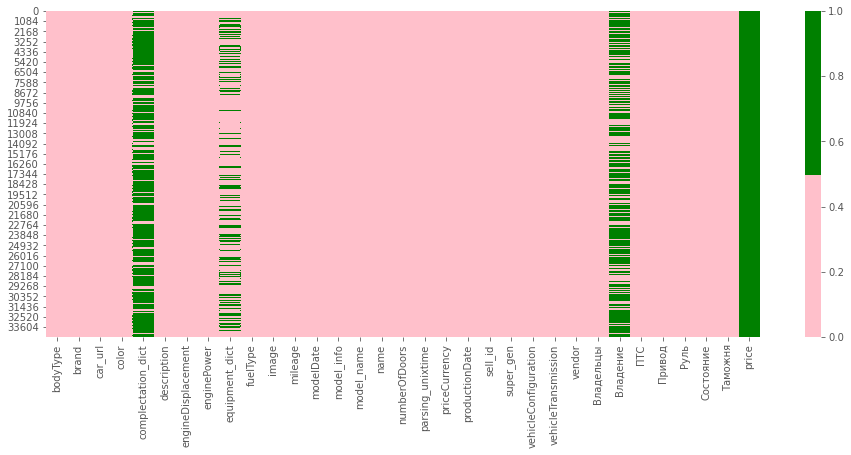

In [137]:
print (f'Дубликаты: {test.duplicated().sum()}')
print (display(test.isna().sum()[test.isna().sum() > 0]))
colours = ['pink', 'green']
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull(), cmap=sns.color_palette(colours))


как видно - дубликтов в датасете нет, но зато есть признаки с пропусками, при том в некоторыхпоказателях их существенное количество. К ним относятся: complectation_dict, equipment_dict, Владение, ПТС. В дальнейшем их рассмотрим подробнее и примем решение об их использовании. Признак цены был добавлен и там еще нет данных. 

Разделим признаки по видам.
- Категориальные: 'bodyType', 'brand', 'color', 'fuelType', 'model_name', 'priceCurrency', 'vehicleTransmission', 'vendor', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние', 'Таможня'
- Числовые: 'mileage', 'numberOfDoors', 'sell_id', 'price'
- Временные: 'modelDate', 'productionDate', 'parsing_unixtime'
- Описательные: 'complectation_dict', 'description', 'engineDisplacement', 'enginePower', 'equipment_dict', 'model_info', 'name', 'vehicleConfiguration'

# Категориальные признаки

In [63]:
cat_features = ['bodyType', 'brand', 'color', 'fuelType', 'model_name', 'priceCurrency', 'vehicleTransmission', 'vendor', 
                'Владельцы', 'ПТС', 'Привод', 'Руль', 'Состояние', 'Таможня']

dict_category = {}
for category in cat_features:
    data_category = test[category].value_counts()
    dict_category[category] = len(data_category)

print (dict_category)

{'bodyType': 24, 'brand': 12, 'color': 16, 'fuelType': 5, 'model_name': 544, 'priceCurrency': 1, 'vehicleTransmission': 4, 'vendor': 2, 'Владельцы': 3, 'ПТС': 2, 'Привод': 3, 'Руль': 2, 'Состояние': 1, 'Таможня': 1}


как видно, в основном в признаки имеют относительно небольшое количество вариаций. Но следует отметить, что вариантов моделей автомобилей - 544, что существенно выбивается из общей тенденции. С другой стороны в таких признаках, как таможня, состояние и priceCurrency (валюта) всего по одному варианту, а vendor (производитель), ПТС и Руль - по два. Для дальнейшего EDA-анализа можем их заменить на бинарные
Ранее было обнаружено, что признаке ПТС есть пропуск. Рассмотрим его ближе

In [71]:
test['ПТС'].value_counts()

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64

In [73]:
# заменим пропуск в этом признаке на наиболее часто встречающееся значение
test['ПТС'].fillna(test.ПТС.mode()[0], inplace=True)

### bodyType

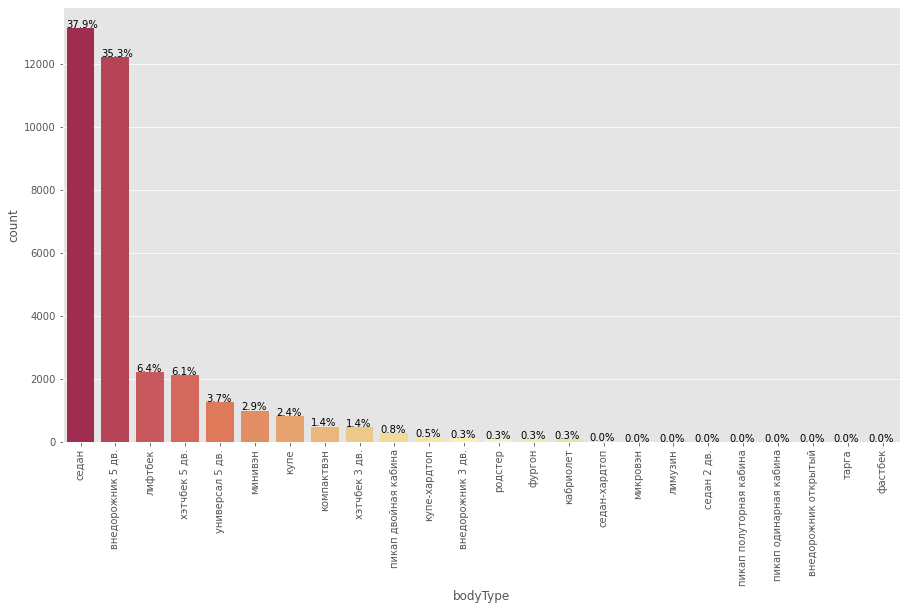

In [122]:
categorial_feature("bodyType", test, rotate=90)

как видно, наиболее распространенные модели кузова - это седан и 5дверный внедорожник

### brand

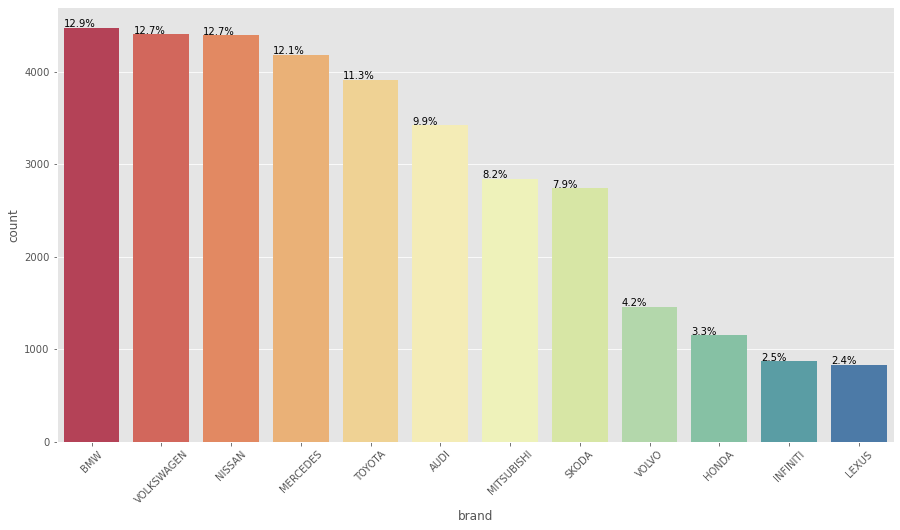

In [123]:
categorial_feature("brand", test, rotate=45)

лидерами по моделям являются БМВ, Фольксвагены и Ниссаны,а также Мерседесы и Тойоты. Люксовых марок авто представлено меньше всего

### color

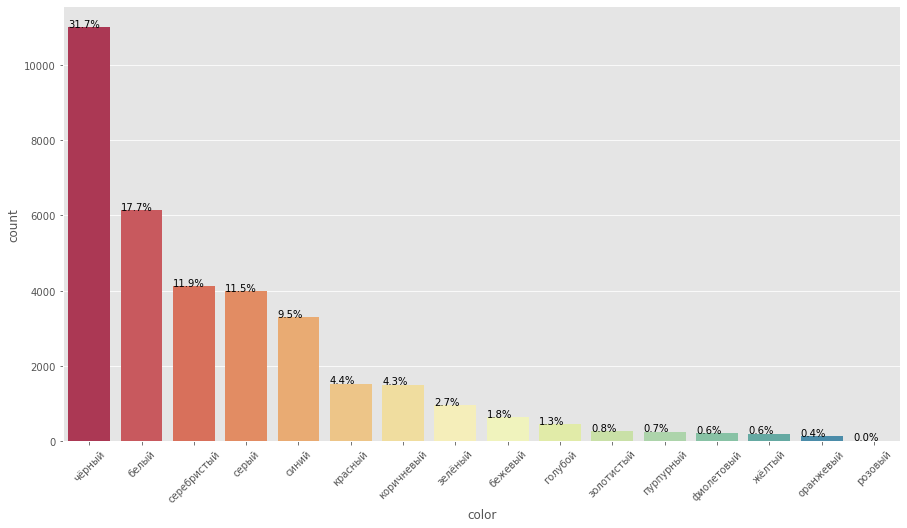

In [124]:
categorial_feature("color", test, rotate=45)

самый распространенный цвет авто - черный

### fuel

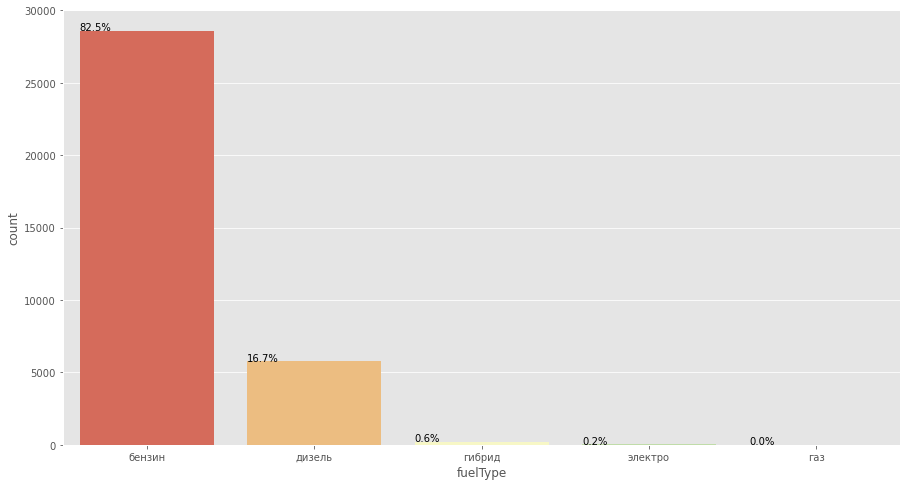

In [126]:
categorial_feature("fuelType", test, rotate=0)

бензиновые двигатели ожидаемо наиболее распространенные среди автомобилей

### transmission

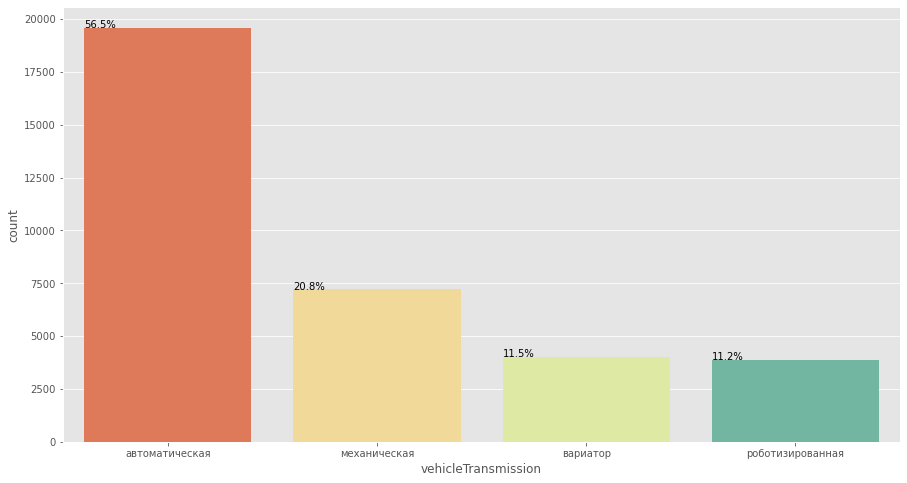

In [127]:
categorial_feature("vehicleTransmission", test, rotate=0)

наиболее часто встречающиеся авто - с АКПП, что обусловлено популярностью иномарок

### vendor

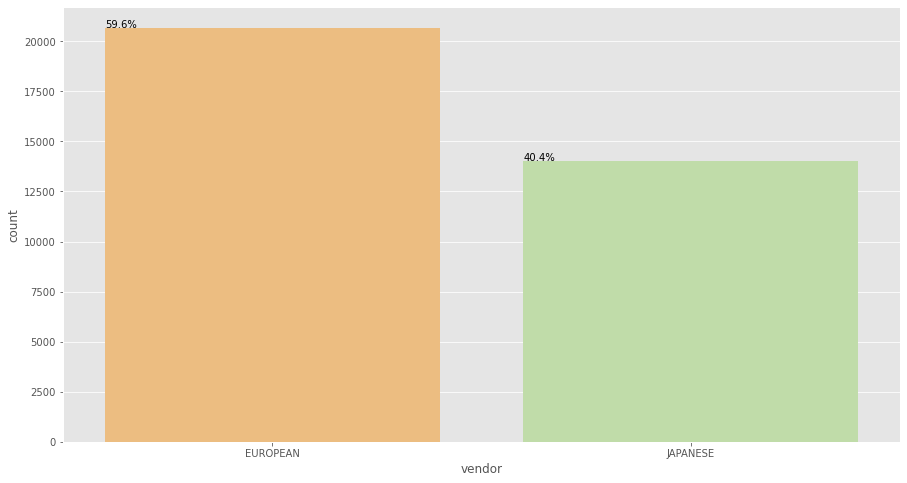

In [128]:
categorial_feature("vendor", test, rotate=0)

вариантов производителей немного - либо европейские, либо японские

# Числовые признаки

In [131]:
num_features = ['mileage', 'numberOfDoors', 'sell_id']

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'numberOfDoors'}>],
       [<AxesSubplot:title={'center':'sell_id'}>, <AxesSubplot:>]],
      dtype=object)

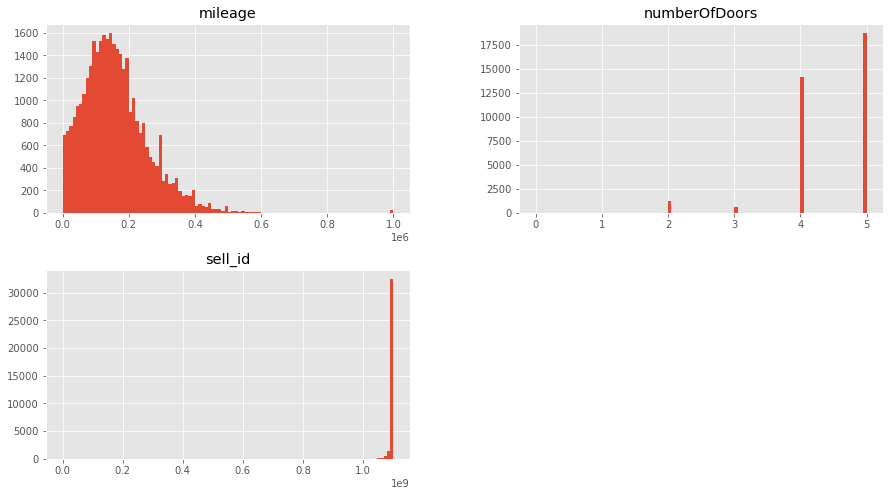

In [141]:
# рассмотрим распределение числовых признаков
test[num_features].hist(figsize=(15, 8), bins=100)

min          1.000000
max    1000000.000000
25%      91153.500000
50%     149779.500000
75%     215000.000000
std     100676.559489
Name: mileage, dtype: float64


C:\Users\007\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



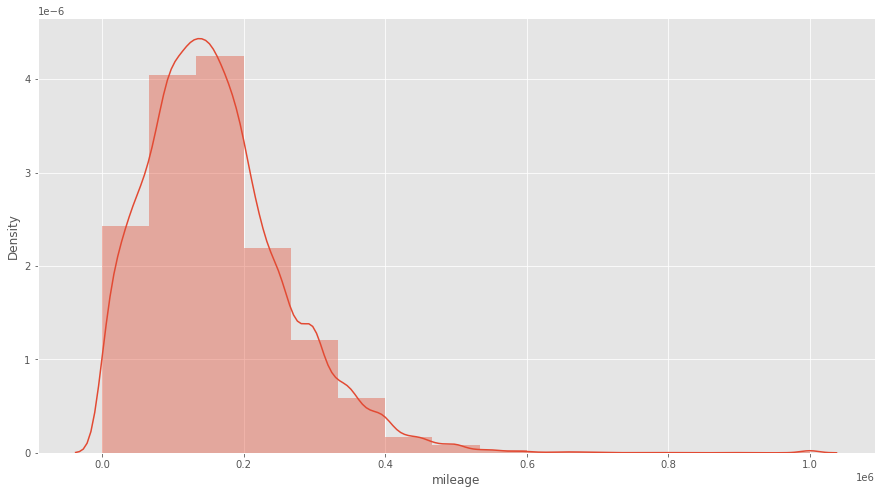

In [136]:
numeric_feature(test.mileage, bins=15)

min    0.00000
max    5.00000
25%    4.00000
50%    5.00000
75%    5.00000
std    0.70304
Name: numberOfDoors, dtype: float64


C:\Users\007\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



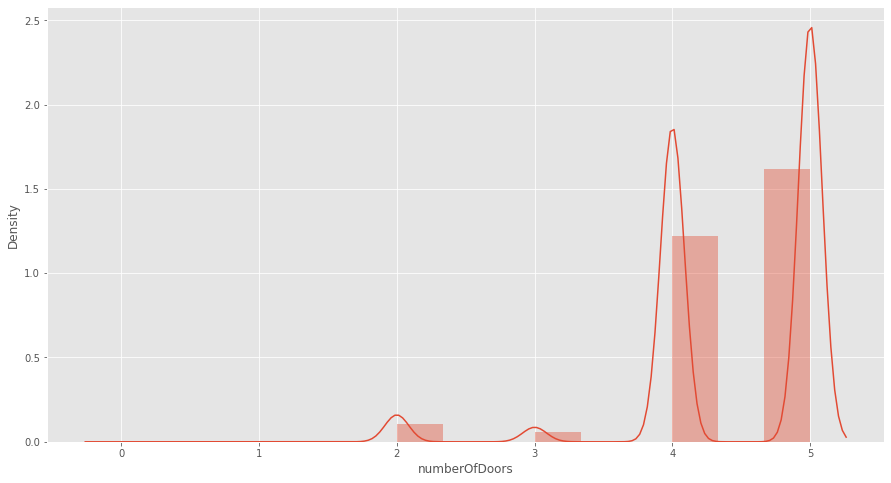

In [142]:
numeric_feature(test.numberOfDoors, bins=15)

На основе этих графиков можно сделать вывод, что пробег состявляет у большинства машин и для некоторых машин в пределе до 200 тыс. км . По второму графику видно, что основные категории составляют 4-5 дверные машины, имеется небольшой процент 2-х и 3-х дверных машин.
Графики для modelDate и productionDate в целом очень похожи. Представленные машины были произведены в период с 1980 по 2020 годы (также имеются и более ранние машины, но их очень мало). Основную массу составляют машины примерно, начиная с 2010 года.